In [7]:
import numpy as np
import pandas as pd
import scipy

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Methods implementation

In [8]:
def distance(point1, point2, metrics='minkowski', q=2):
    from numpy.linalg import norm
    
    #d = np.linalg.norm(point1 - point2)
    if metrics == 'minkowski':
        d = ((abs(point1 - point2) ** q).sum()) ** (1/q)
    elif metrics == 'cos':
        d = (point1 * point2).sum() / (norm(point1) * norm(point2))
    elif metrics == 'covariance':
        d = (point1 - point.mean()) * (point2 - point2.mean()).sum() / (norm(point1) * norm(point2))
    else:
        raise
        return
    return d

def weight(dist, func='identity', a=1, b=1, q=0.5):
    if func == 'identity':
        w = dist
    elif func == 'inverse':
        w = 1 / (dist + a) ** b
    elif func == 'power':
        w = q ** dist
    else:
        raise
        return
    return w

def k_nearest_neighbors_classifier(X, y, test_data, k, 
                                   metrics='minkowski',
                                   weight_func='identity'):
    labels = []
    dists = np.array([[distance(test_x, x, metrics) for x in X] for test_x in test_data])
    weighted_dists = weight(dists, func=weight_func)
    sorted_dist_indices = np.argsort(weighted_dists, axis=1)
    closest_k = np.sort(weighted_dists, axis=1)[:,:k]
    y_for_closest_k = y[sorted_dist_indices][:,:k]#.astype(int)
    label_set = list(set(y))
    for i in range(len(y_for_closest_k)):
        index = np.array([np.array([y * closest_k[i][j]
                                    for j in range(len(y_for_closest_k[i]))
                                    if y_for_closest_k[i][j] == label]).sum()
                          for label in label_set]).argmax()
        labels.append(label_set[index])
    return labels

# Quality check

In [9]:
def accuracy(y, y_pred):
    return np.where(y - y_pred == 0)[0].size / len(y)

#  Visualizing algorithms results

In [10]:
def plot_2f_dataset(data, labels, colors=None): 
    from numpy.random import rand
    data = np.array(data)
    labels = np.array(labels)
    n = len(set(labels))
    if(colors == None):
        colors = ListedColormap([tuple(rand(3)) for i in range(n)])
    pyplot.figure(figsize(5, 5))
    pyplot.scatter(data[:,0], data[:,1], c = labels, cmap = colors)
    plt.show()

In [11]:
def print_result(true, predict, cut = 5):
    #print('w:\n',coef,'\n')
    if len(true) > cut:
        nl = '\n...\n'
    else:
        nl = '\n'
    print('true vs. prediction:\n',vstack((true,predict)).T[:cut],nl)
    print('accuracy: ',round(accuracy(true, predict),3))

# Data

### Generate dataset

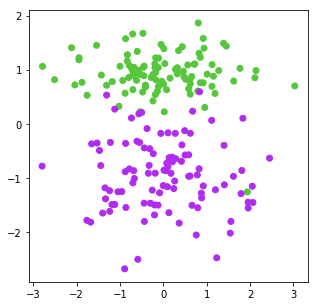

In [17]:
from sklearn import datasets

sample_size = 200
data, target = datasets.make_classification(n_samples=sample_size, n_features=2, 
                                            n_informative=1, n_redundant=0, 
                                            n_repeated=0, n_classes=2, 
                                            n_clusters_per_class=1, 
                                            weights=None, flip_y=0.01, 
                                            class_sep=1.0, hypercube=True, 
                                            shift=0.0, scale=1.0, 
                                            shuffle=True, random_state=1)
#w = datasets.load_wine()
#data, target = w.data, w.target
plot_2f_dataset(data, target)

### Toy dataset "Iris"

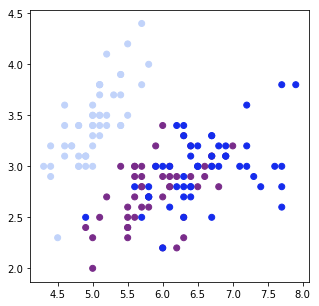

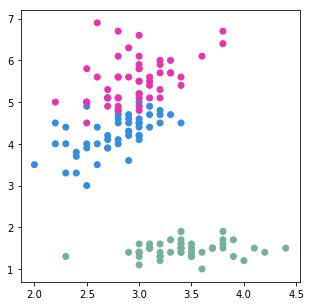

In [18]:
dataset = datasets.load_iris()
data = dataset.data
target = dataset.target
plot_2f_dataset(data[:,:2], target)
plot_2f_dataset(data[:,1:3], target)
plt.show()

### Split dataset into train & test samples

In [19]:
from sklearn import cross_validation as cross_val

train_data, test_data, \
train_labels, test_labels = cross_val.train_test_split(data, target,
                                                       test_size = 0.3)

In [20]:
print('train_data: \n',train_data[:5],'\n...\n')
print('train_labels: \n',train_labels[:5],'...')

train_data: 
 [[ 5.   3.5  1.6  0.6]
 [ 6.4  2.9  4.3  1.3]
 [ 4.7  3.2  1.6  0.2]
 [ 6.   2.2  5.   1.5]
 [ 6.9  3.1  5.4  2.1]] 
...

train_labels: 
 [0 1 0 2 2] ...


### Run model and output

In [21]:
test_labels_predict = k_nearest_neighbors_classifier(train_data, train_labels,
                                                     test_data, 3)

print_result(test_labels, test_labels_predict, cut = 10)
if train_data.shape[1] == 2 and (train_data.dtype.type == np.float64
                                 or train_data.dtype.type == np.int64):
    #plot_2f_dataset(train_data, train_labels_predict)
    plot_2f_dataset(test_data, test_labels_predict)

true vs. prediction:
 [[0 0]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [2 2]] 
...

accuracy:  0.978


### sklearn.naive_bayes.GaussianNB for check

In [22]:
from sklearn import neighbors

KNN_classifier = neighbors.KNeighborsClassifier()
KNN_classifier.fit(train_data,train_labels)
print_result(test_labels, KNN_classifier.predict(test_data))
if train_data.shape[1] == 2 and (train_data.dtype.type == np.float64
                                 or train_data.dtype.type == np.int64):
    #plot_2f_dataset(train_data, Gaussian_NB_classifier.predict(train_data))
    plot_2f_dataset(test_data, KNN_classifier.predict(test_data))

true vs. prediction:
 [[0 0]
 [1 1]
 [0 0]
 [2 2]
 [1 1]] 
...

accuracy:  0.978
